In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('golf.csv')
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [52]:
df['Windy']=df['Windy'].apply(lambda x : 'T' if x== True else 'F')

In [53]:
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,F,No
1,Rainy,Hot,High,T,No
2,Overcast,Hot,High,F,Yes
3,Sunny,Mild,High,F,Yes
4,Sunny,Cool,Normal,F,Yes
5,Sunny,Cool,Normal,T,No
6,Overcast,Cool,Normal,T,Yes
7,Rainy,Mild,High,F,No
8,Rainy,Cool,Normal,F,Yes
9,Sunny,Mild,Normal,F,Yes


In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
df['FUEL'] = encoder.fit_transform(df['FUEL'])
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [63]:
def airflow(x):
    if x<6:
        return 1
    elif x<11:
        return 2
    else:
        return 3
df ['AIRFLOW'] = df['AIRFLOW'].apply(airflow)
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,1,75,0
1,1,0,10,96,1,72,1
2,1,0,10,96,1,70,1
3,1,0,10,96,1,68,1
4,1,0,10,109,1,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,1,5,0
17438,7,2,190,84,1,4,0
17439,7,2,190,80,1,3,0
17440,7,2,190,76,1,2,0


In [64]:
def distance(x):
    if x<70:
        return 1
    elif x<140:
        return 2
    else:
        return 3
df ['DISTANCE'] = df['DISTANCE'].apply(distance)
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,1,96,1,75,0
1,1,0,1,96,1,72,1
2,1,0,1,96,1,70,1
3,1,0,1,96,1,68,1
4,1,0,1,109,1,67,1
...,...,...,...,...,...,...,...
17437,7,2,3,86,1,5,0
17438,7,2,3,84,1,4,0
17439,7,2,3,80,1,3,0
17440,7,2,3,76,1,2,0


In [65]:
def desibel(x):
    if x<50:
        return 1
    elif x<100:
        return 2
    else:
        return 3
df ['DESIBEL'] = df['DESIBEL'].apply(desibel)
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,1,2,1,75,0
1,1,0,1,2,1,72,1
2,1,0,1,2,1,70,1
3,1,0,1,2,1,68,1
4,1,0,1,3,1,67,1
...,...,...,...,...,...,...,...
17437,7,2,3,2,1,5,0
17438,7,2,3,2,1,4,0
17439,7,2,3,2,1,3,0
17440,7,2,3,2,1,2,0


In [66]:
def frequency(x):
    if x<25:
        return 1
    elif x<50:
        return 2
    else:
        return 3
df ['FREQUENCY'] = df['FREQUENCY'].apply(frequency)
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,1,2,1,3,0
1,1,0,1,2,1,3,1
2,1,0,1,2,1,3,1
3,1,0,1,2,1,3,1
4,1,0,1,3,1,3,1
...,...,...,...,...,...,...,...
17437,7,2,3,2,1,1,0
17438,7,2,3,2,1,1,0
17439,7,2,3,2,1,1,0
17440,7,2,3,2,1,1,0


In [17]:
df.dtypes

Outlook      object
Temp         object
Humidity     object
Windy          bool
Play Golf    object
dtype: object

In [29]:
def entropy(x):
    probs=x.value_counts(normalize=True)
    entropy=-np.sum(probs*np.log2(probs))
    return entropy

In [30]:
def gain(data, split, target):
    total_entropy = entropy(data[target])
    subset_entropy = 0
    for i in data[split].unique():
        subset = data[data[split]==i]
        subset_entropy += (len(subset)/len(data))*entropy(subset[target])
    gain = total_entropy - subset_entropy
    return gain

In [31]:
def fit(data, target, depth=0, max_depth=5):
    if len(data.columns)==1 or depth == max_depth:
        return data[target].mode()[0]
    else:
        gains = []
        for i in data.columns:
            if i!=target:
                gains.append(gain(data,i,target))

        split_variable = data.columns[np.argmax(gains)]
        tree = {}
        tree['Split_variable'] = split_variable
        tree['depth'] = depth
        
        for category in data[split_variable].unique():
            subset=data[data[split_variable]==category].drop(split_variable,axis=1)
            subtree=fit(subset,target,depth=depth+1,max_depth=max_depth)
            tree[category]=subtree
        return tree

In [32]:
def predict_one(x,tree):
    col = df.columns
    while(True):
        var = tree['Split_variable']
        for i in range(len(col)):
            if col[i] == var:
                ind = i
        val = x[ind]
        if str(type(tree[val])) == "<class 'dict'>":
            tree = tree[val]
        else:
            return tree[val]

In [33]:
def predict(X,tree):
    test = np.array(X)
    a = []
    for i in test:
        a.append(predict_one(i,tree))
    return a

In [54]:
X = df.iloc[:,:4]
Y = df.iloc[:,4]

In [55]:
X

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,High,F
1,Rainy,Hot,High,T
2,Overcast,Hot,High,F
3,Sunny,Mild,High,F
4,Sunny,Cool,Normal,F
5,Sunny,Cool,Normal,T
6,Overcast,Cool,Normal,T
7,Rainy,Mild,High,F
8,Rainy,Cool,Normal,F
9,Sunny,Mild,Normal,F


In [61]:
from sklearn.model_selection import train_test_split 

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [63]:
# concatenating data frame for test set
data = pd.concat([X_train, Y_train], axis=1, ignore_index=True)
data.columns = df.columns
data

,Outlook,Temp,Humidity,Windy,Play Golf
4,Sunny,Cool,Normal,F,Yes
7,Rainy,Mild,High,F,No
12,Overcast,Hot,Normal,F,Yes
5,Sunny,Cool,Normal,T,No
10,Rainy,Mild,Normal,T,Yes
0,Rainy,Hot,High,F,No
1,Rainy,Hot,High,T,No
11,Overcast,Mild,High,T,Yes
8,Rainy,Cool,Normal,F,Yes


In [64]:
tree = fit(df,df.columns[4])
print(tree)

{'Split_variable': 'Outlook', 'depth': 0, 'Rainy': {'Split_variable': 'Humidity', 'depth': 1, 'High': {'Split_variable': 'Temp', 'depth': 2, 'Hot': {'Split_variable': 'Windy', 'depth': 3, 'F': 'No', 'T': 'No'}, 'Mild': {'Split_variable': 'Windy', 'depth': 3, 'F': 'No'}}, 'Normal': {'Split_variable': 'Temp', 'depth': 2, 'Cool': {'Split_variable': 'Windy', 'depth': 3, 'F': 'Yes'}, 'Mild': {'Split_variable': 'Windy', 'depth': 3, 'T': 'Yes'}}}, 'Overcast': {'Split_variable': 'Temp', 'depth': 1, 'Hot': {'Split_variable': 'Humidity', 'depth': 2, 'High': {'Split_variable': 'Windy', 'depth': 3, 'F': 'Yes'}, 'Normal': {'Split_variable': 'Windy', 'depth': 3, 'F': 'Yes'}}, 'Cool': {'Split_variable': 'Humidity', 'depth': 2, 'Normal': {'Split_variable': 'Windy', 'depth': 3, 'T': 'Yes'}}, 'Mild': {'Split_variable': 'Humidity', 'depth': 2, 'High': {'Split_variable': 'Windy', 'depth': 3, 'T': 'Yes'}}}, 'Sunny': {'Split_variable': 'Windy', 'depth': 1, 'F': {'Split_variable': 'Temp', 'depth': 2, 'Mild':

In [67]:
Y_pred = predict(X_test,tree)
Y_pred

['Yes', 'Yes', 'Yes', 'Yes', 'No']

In [68]:
from sklearn.metrics import accuracy_score
print(f"Accuracy : {accuracy_score(Y_test, Y_pred)*100:.2f} %")

Accuracy : 100.00 %


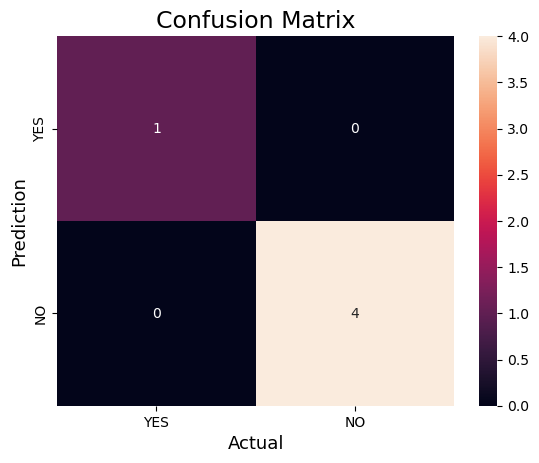

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,
            annot=True,
            xticklabels=['YES','NO'],
            yticklabels=['YES','NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()